In [35]:
import numpy as np
import matplotlib.pyplot as plt
import data_gen
from data_gen import true_func

ImportError: cannot import name 'true_func' from 'data_gen' (/Users/jackroberts/Documents/PORTFOLIO/regression/data_gen.py)

# Gaussian Process Regression

A Gaussian process builds a surrogate model for a model too expensive to call loads of times. It extends a multivariate Gaussian to infinite dimensions, meaning random variables $x$ becomes random functions $f(x)$. The mean of the variables $\mu$ becomes a mean function $m(x)$ and rather than a covariance matrix $\Sigma_{ij}$ we have a covariance function $\textbf{k}(x_i, x_j)$.
### Covariance functions
There are quite a few covariance functions, but the one we'll use is the squared exponential covariance function - RBFs - 
$$
k(\textbf{x}, \textbf{x'}) = v\text{exp}\left[-\frac{1}{2} \sum^d_{i=1} \frac{(x_i-x_i')^2}{\ell^2_i} \right],
$$
where $v,\ell_i >0, i=1, ..., d$ are hyperparameters. <br>
For each of these covariance functions, $v$ is known as the $\textbf{signal variance}$ or $\textbf{signal strength}$. The bigger it is, the more the GP $f(x)$ will vary about the mean.

### Algorithm


#### Define RBF

In [30]:
def RBF(x0: np.array, x1: np.array, ell: float, v: float) -> np.array:
    summs = -0.5 * np.sum(((x0 - x1)**2)/ell**2)
    return v * np.exp(summs)

NameError: name 'true_func' is not defined

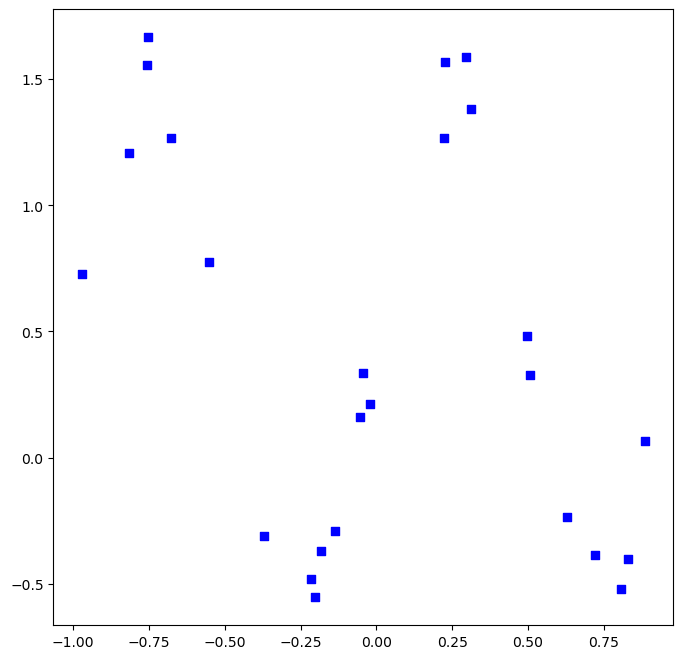

In [33]:
num_obvs = 25
sigma = 0.1
x_data = np.random.uniform(-1, 1, num_obvs)
y_data = data_gen.data(x_data, sigma**2)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_data, y_data, marker='s', label='Observations', color="b")
ax.plot(x_data, true_func(-1, 1), label='True function', color="k", linestyle='--')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title("Noisy observations of the original function $y = 1/2 sin(2\pi X) + \epsilon$")
ax.legend()
ax.grid(True)